# ODEs: Projectile motion


In one of our problem sets, we simulated the the equation for a projectile. Of course, the answer is:

$$
\vec{x}(t) = \frac{1}{2}\vec{a}_0t^2 + \vec{v}_0 t + \vec{x}_0
$$

However, we now will be looking into direct solution of the ordinary differential equation using numerical methods. The equation of motion is

$$
\ddot{\vec{r}}(t) = -g\hat{y}
$$

We will try three different methods:

- Euler 
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \tau \vec{v}_n$$
- Euler-Cromer
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \tau \vec{v}_{n+1}$$
- Midpoint
$$\vec{v}_{n+1} = \vec{v}_n + \tau \vec{a}_n$$
$$\vec{x}_{n+1} = \vec{x}_n + \frac{\tau}{2}\left(\vec{v}_n + \vec{v}_{n+1}\right)$$


We will also investigate using air resistance:

$$F_D = \frac{1}{2}\rho v^2 C_D A$$


In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['legend.fancybox'] = True
import matplotlib.pyplot as plt
from odes import *

In [2]:
# Use air resistance or not?
airFlag = True

# Method:
method = b'Midpoint'
# OR: 
# method = 'Euler'
# method = 'Euler-Cromer'
# method = 'Midpoint'

# Maximum number of steps
maxStep = 1000

# Time step
tau = 0.05

# Height
h = 1.8 # m

# Initial x velocity
vix = 40 # m / s   # Around 90 mph



# Max time
tmax = tau * maxStep

#* Physical parameters (mass, Cd, etc.)
Cd = 0.35      # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
grav = -9.81    # Gravitational acceleration (m/s^2)
mass = 0.145   # Mass of projectile (kg)
if not airFlag  :
    rho = 0      # No air resistance
else :
    rho = 1.2    # Density of air (kg/m^3)
air_const = 0.5*Cd*rho*area/mass  # Air resistance constant

print(air_const)

# State values.
t = np.arange(0,tmax,tau)
r = np.zeros((maxStep,2))
v = np.zeros((maxStep,2))
a = np.zeros((maxStep,2))
r[0,:] = np.array([0,h])
v[0,:] = np.array([vix,0])
a[0,:] = np.array([0,grav])

0.006227586206896551


### Get true solutions with no air resistance

In [3]:

r0 = np.array(r[0]).reshape((2,1))
v0 = np.array(v[0]).reshape((2,1))
a0 = np.array(a[0]).reshape((2,1))
rtrue = r0 + v0 * t + 0.5 * a0*t**2
cut = (rtrue[1,:] > 0)
rtrue = rtrue.T[cut].T

### Simulate the trajectory

In [4]:
#* Loop until ball hits ground or max steps completed
ri = np.array(r[0])
vi = np.array(v[0])
ai = np.array(a[0])
state = np.array( [ri,vi,ai] )
for iStep in np.arange(1,maxStep) :
    ti = t[iStep-1]
    normV = np.linalg.norm( state[1] )
    state[2] =-air_const*normV * state[1]
    state[2][1] += grav
    #* Calculate the new position and velocity using Euler method
    if method == b'Euler' :
        state = step_euler(tau, state)
    elif method == b'Euler-Cromer' :
        state = step_euler_cromer(tau, state)
    else : # Midpoint step
        state = step_midpoint(tau,state)        
    r[iStep] = state[0]
    v[iStep] = state[1]
    a[iStep] = state[2]

[[ 0.          1.8       ]
 [40.          0.        ]
 [-9.96413793 -9.81      ]]
[[ 1.98754483  1.7877375 ]
 [39.5017931  -0.4905    ]
 [-9.71822269 -9.68932729]]
[[ 3.9504867   1.75110084]
 [39.01588197 -0.97496636]
 [-9.48283427 -9.57303382]]
[[ 5.88942726  1.69038623]
 [38.54174026 -1.45361806]
 [-9.25744309 -9.46085161]]
[[ 7.80494247  1.60587926]
 [38.0788681  -1.92666064]
 [-9.0415523  -9.35252834]]
[[ 9.69758393  1.49785557]
 [37.62679049 -2.39428705]
 [-8.83469525 -9.24782618]]
[[11.56788009  1.36658144]
 [37.18505572 -2.85667836]
 [-8.63643319 -9.14652078]]
[[13.41633733  1.21231437]
 [36.75323406 -3.3140044 ]
 [-8.44635318 -9.04840031]]
[[15.2434411   1.03530365]
 [36.33091641 -3.76642442]
 [-8.2640661  -8.95326465]]
[[17.04965683  0.83579084]
 [35.9177131  -4.21408765]
 [-8.08920499 -8.86092457]]
[[18.83543098  0.61401031]
 [35.51325285 -4.65713388]
 [-7.92142333 -8.77120107]]
[[20.60119185  0.37018961]
 [35.11718168 -5.09569393]
 [-7.76039362 -8.68392471]]
[[22.34735044  0

[[ 1.80561849e+02 -4.88502647e+02]
 [ 1.13028637e+00 -3.95985390e+01]
 [-2.78845890e-01 -4.08918105e-02]]
[[ 1.80618015e+02 -4.90482625e+02]
 [ 1.11634408e+00 -3.96005836e+01]
 [-2.75417734e-01 -3.99808735e-02]]
[[ 1.80673488e+02 -4.92462705e+02]
 [ 1.10257319e+00 -3.96025826e+01]
 [-2.72031336e-01 -3.90899652e-02]]
[[ 1.80728276e+02 -4.94442882e+02]
 [ 1.08897162e+00 -3.96045371e+01]
 [-2.68686201e-01 -3.82186532e-02]]
[[ 1.80782389e+02 -4.96423157e+02]
 [ 1.07553731e+00 -3.96064480e+01]
 [-2.65381838e-01 -3.73665142e-02]]
[[ 1.80835834e+02 -4.98403526e+02]
 [ 1.06226822e+00 -3.96083164e+01]
 [-2.62117763e-01 -3.65331337e-02]]
[[ 1.80888620e+02 -5.00383988e+02]
 [ 1.04916233e+00 -3.96101430e+01]
 [-2.58893496e-01 -3.57181061e-02]]
[[ 1.80940754e+02 -5.02364540e+02]
 [ 1.03621766e+00 -3.96119289e+01]
 [-2.55708563e-01 -3.49210341e-02]]
[[ 1.80992246e+02 -5.04345180e+02]
 [ 1.02343223e+00 -3.96136750e+01]
 [-2.52562496e-01 -3.41415290e-02]]
[[ 1.81043101e+02 -5.06325906e+02]
 [ 1.010804

[[ 1.84686528e+02 -8.67340773e+02]
 [ 1.05224509e-01 -3.96883126e+01]
 [-2.60076322e-02 -5.07413154e-04]]
[[ 1.84691757e+02 -8.69325189e+02]
 [ 1.03924127e-01 -3.96883379e+01]
 [-2.56862399e-02 -4.95718671e-04]]
[[ 1.84696921e+02 -8.71309607e+02]
 [ 1.02639815e-01 -3.96883627e+01]
 [-2.53688187e-02 -4.84292421e-04]]
[[ 1.84702021e+02 -8.73294026e+02]
 [ 1.01371374e-01 -3.96883869e+01]
 [-2.50553196e-02 -4.73128288e-04]]
[[ 1.84707059e+02 -8.75278446e+02]
 [ 1.00118608e-01 -3.96884106e+01]
 [-2.47456941e-02 -4.62220291e-04]]
[[ 1.84712034e+02 -8.77262867e+02]
 [ 9.88813234e-02 -3.96884337e+01]
 [-2.44398945e-02 -4.51562587e-04]]
[[ 1.84716947e+02 -8.79247289e+02]
 [ 9.76593287e-02 -3.96884563e+01]
 [-2.41378734e-02 -4.41149464e-04]]
[[ 1.84721800e+02 -8.81231712e+02]
 [ 9.64524351e-02 -3.96884783e+01]
 [-2.38395841e-02 -4.30975339e-04]]
[[ 1.84726593e+02 -8.83216137e+02]
 [ 9.52604558e-02 -3.96884999e+01]
 [-2.35449807e-02 -4.21034757e-04]]
[[ 1.84731326e+02 -8.85200562e+02]
 [ 9.408320

 [-8.21513933e-05 -8.57753335e-09]]
[[ 1.85108300e+02 -1.78813272e+03]
 [ 3.28261465e-04 -3.96894088e+01]
 [-8.11361285e-05 -8.37397351e-09]]
[[ 1.85108316e+02 -1.79011720e+03]
 [ 3.24204659e-04 -3.96894088e+01]
 [-8.01334108e-05 -8.17523471e-09]]
[[ 1.85108332e+02 -1.79210167e+03]
 [ 3.20197988e-04 -3.96894088e+01]
 [-7.91430852e-05 -7.98120858e-09]]
[[ 1.85108348e+02 -1.79408614e+03]
 [ 3.16240834e-04 -3.96894088e+01]
 [-7.81649985e-05 -7.79177967e-09]]
[[ 1.85108364e+02 -1.79607061e+03]
 [ 3.12332584e-04 -3.96894088e+01]
 [-7.71989995e-05 -7.60683783e-09]]
[[ 1.85108379e+02 -1.79805508e+03]
 [ 3.08472634e-04 -3.96894088e+01]
 [-7.62449387e-05 -7.42628359e-09]]
[[ 1.85108395e+02 -1.80003955e+03]
 [ 3.04660387e-04 -3.96894088e+01]
 [-7.53026686e-05 -7.25000682e-09]]
[[ 1.85108410e+02 -1.80202402e+03]
 [ 3.00895254e-04 -3.96894088e+01]
 [-7.43720435e-05 -7.07791159e-09]]
[[ 1.85108425e+02 -1.80400849e+03]
 [ 2.97176651e-04 -3.96894088e+01]
 [-7.34529195e-05 -6.90989310e-09]]
[[ 1.85108

### Plot it for $y>0$

In [5]:
cut = (r[:,1] > 0)
r = r[cut]
v = v[cut]
a = a[cut]
t = t[cut]

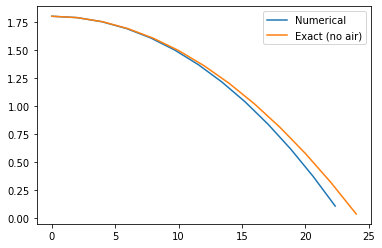

In [6]:

plt.plot(r[:,0],r[:,1], label="Numerical")
plt.plot(rtrue[0,:], rtrue[1,:], label="Exact (no air)")
plt.legend()
plt.show()